In [1]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.pvsystem import PVSystem
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
location = Location(latitude=38.70755951894462, longitude=35.529753564832944, tz="Europe/Istanbul", altitude = 1050, name='Erciyes Üniversitesi')

In [3]:
location

Location: 
  name: Erciyes Üniversitesi
  latitude: 38.70755951894462
  longitude: 35.529753564832944
  altitude: 1050
  tz: Europe/Istanbul

In [4]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

In [5]:
module = sandia_modules['Canadian_Solar_CS6X_300M__2013_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_240__240V_']

In [6]:
temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [7]:
system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters)

In [8]:
modelchain = ModelChain(system,location)

In [9]:
times = pd.date_range(start="2022-04-01", end="2022-04-08", freq='1min', tz=location.tz)

In [10]:
clear_sky = location.get_clearsky(times)

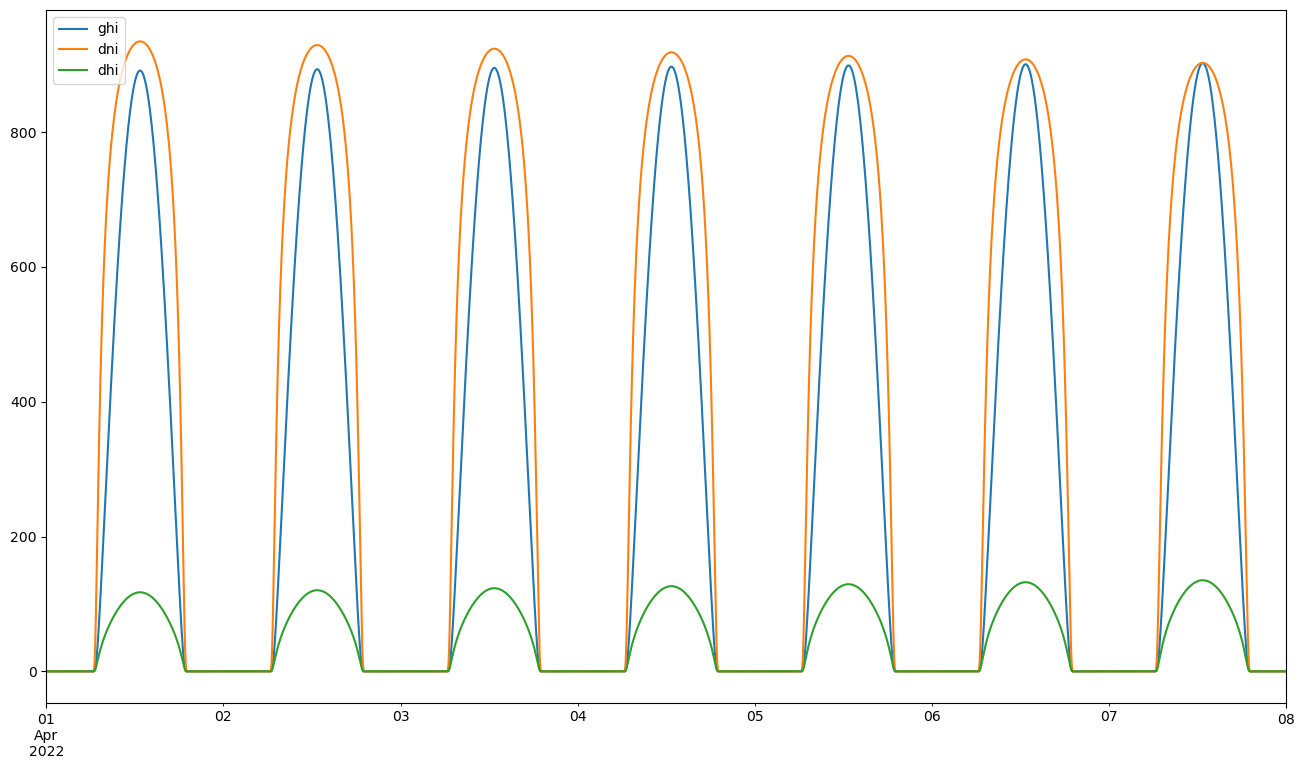

In [11]:
clear_sky.plot(figsize=(16,9))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

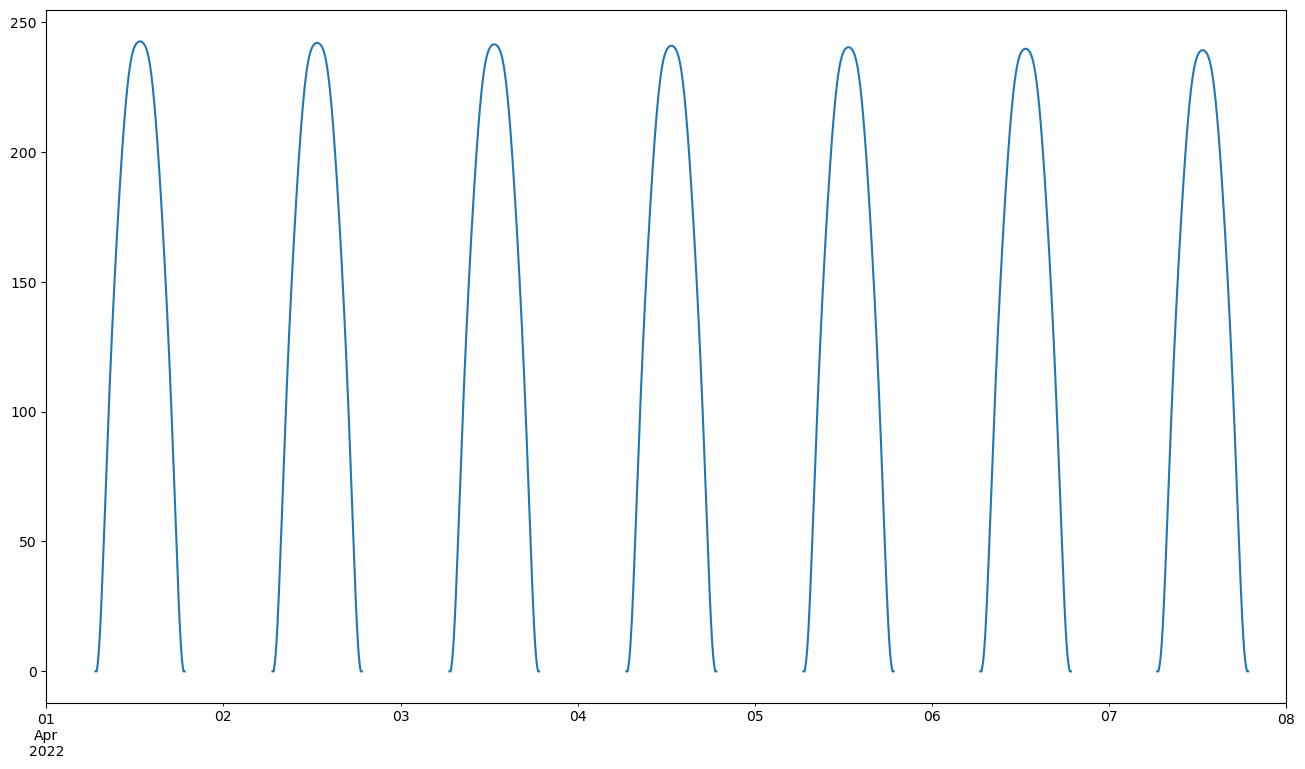

In [12]:
modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
plt.show

In [13]:
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30.0,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.5048,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [14]:
cec_inverters

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.089607,2.240412,1.846506,1.950539,1.769444,1.843781,46.863808,67.790878,62.554672,18.166279,...,36.033405,2.530101,22.09536,24.465775,42.776474,31.682003,64.774162,54.570091,85.145699,62.486748
Paco,250.0,250.0,300.0,300.0,300.0,300.0,10000.0,10000.0,12000.0,3000.0,...,3180.0,230.0,1100.0,2000.0,2500.0,3000.0,3500.0,4600.0,4800.0,5200.0
Pdco,259.588593,259.492065,311.66925,311.580872,312.421082,312.004578,10488.306641,10295.979492,12358.804688,3142.30127,...,3315.654297,245.630447,1194.094849,2161.879639,2632.835693,3205.932617,3641.840332,4797.806641,4968.027832,5382.856934
Vdco,40.0,40.0,40.0,40.0,45.0,45.0,320.0,362.0,370.0,310.0,...,375.0,40.0,182.0,199.0,218.0,222.5,263.0,254.0,263.0,280.0
C0,-0.000041,-0.000039,-0.000033,-0.000034,-0.000045,-0.000035,-0.000003,-0.000001,-0.000001,-0.000008,...,-0.000008,0.000062,-0.000021,-0.000013,-0.000014,-0.000008,-0.000009,-0.000006,-0.000006,-0.000005
C1,-0.000091,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-0.000036,-0.000049,-0.000056,-0.000011,...,-0.000075,-0.000098,0.000057,0.000055,0.000061,0.000036,0.000035,0.000028,0.000034,0.000044
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56
